# Seaborn Library Exploration
pretty plot playground


# What is it?


Seaborn is a data visualization library with the same functionality as ggplots in R studio. In particular, it’s most widely used to make statistical graphics in Python and integrates closely with the panda datasets. Seaborn plotting functions operates on data frames and performs mapping and statistical aggregation to produce meaningful plots. Some other important functions to note is distributional representations, statistical estimation, plots for categorical data, multivariate views on complex datasets and most importantly making good and effective plots in communication. At its base, seaborn uses matplotlib to draw its plots and it’s recommended to use it in conjunction with Jupyter/Python. 

# Where is Seaborn?

Seaborn Website: https://seaborn.pydata.org/index.html

    Contains a ton of tutorials about the installation process, how to apply different powerful statistical visualization tools, and galleries demonstrating reproducible examples.

Seaborn Github: https://github.com/mwaskom/seaborn

    Contains a link to the seaborn website and a detailed README document that details the Python 3.8+ system library dependenices required to use Seaborn. (These included numpy, pandas, and matplotlib). Notes on citaiton, testing, and development are additionally included.  


# Who developed?


Seaborn was developed by Michael Waskom. He created Seaborn as part of his graduate studies in cognitive neuroscience at the University of California, Berkeley. Theres a 186 contributors towards seaborns github as well!

# Why was it created?

Seaborn was created as a library to build on top of matplotlib to allow users to create effective and highly customizable data visializations. It is able to automatically map data values to their visual attributes through a single function call to quickly create detailed outputs.

# Reading in Libraries & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=UserWarning)                 # Ignore the UserWarning

penguins = sns.load_dataset("penguins")

def snake_case(column_name):
    return column_name.strip().replace(' ', '_').lower()
penguins.rename(columns=snake_case, inplace=True)


# Joint Kernel Density Estimate of Bill Length vs Bill Depth (mm)
### Visualizing Continuous Data 

<Figure size 1000x800 with 0 Axes>

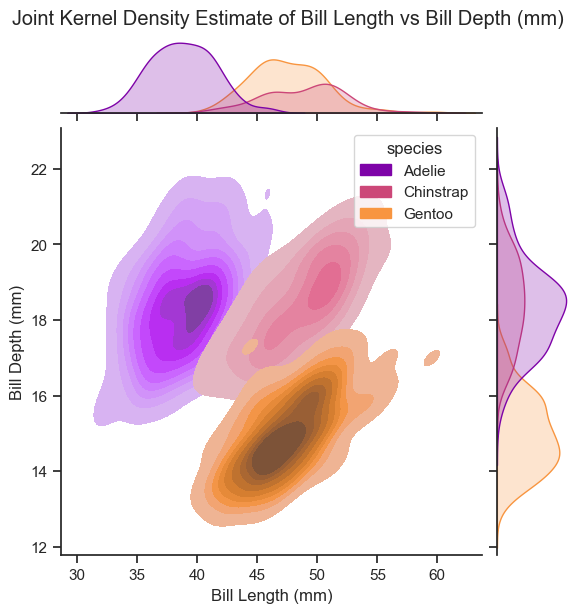

In [3]:
# Show the joint distribution using kernel density estimation
fig = plt.figure(figsize=(10,8))            # Creating a figure with desired dimension

sns.set_theme(style="ticks")                # Sets theme of graph to have major and minor tick marks on gray axes, with a white background

jkde = sns.jointplot(
    data=penguins,          # assigns the data set
    x="bill_length_mm",     # assigns the x variable 
    y="bill_depth_mm",      # assigns the y variable
    hue="species",          # assigns a variable to differentiate color by
    kind="kde",             # asks to provide a kernel density estimation
    palette="plasma",       # assigns the color palette to hue  
    levels=10,              # assigns the number of density contour levels
    fill=True               # asks for density contour levels to be filled
)
jkde.set_axis_labels('Bill Length (mm)', "Bill Depth (mm)")                                         # x and y axis labels
jkde.fig.suptitle("Joint Kernel Density Estimate of Bill Length vs Bill Depth (mm)", y =1.02)       # title of graph positioned not to overlap

plt.show()                  # displays beautiful joint kde 

folder_path = '../figs/'                    # Specifying folder path

jkdefig = 'jkde.png'                        # Specifying filename for saving

save_path = f'{folder_path}/{jkdefig}'      # Combining folder path and filename

jkde.savefig(save_path)                     # Use this figure to save figure in said path

Each layer represents the data distributions for each species. Darker colors indicate greater data density for readings in that region. The length and size of the layers also demonstrates the spread of data points within that level. A normal distribution of each species data for both attributes are displayed on the upper axis (Bill Length (mm)) and right axis (Bill Depth (mm)).

# Scatterplot Matrix

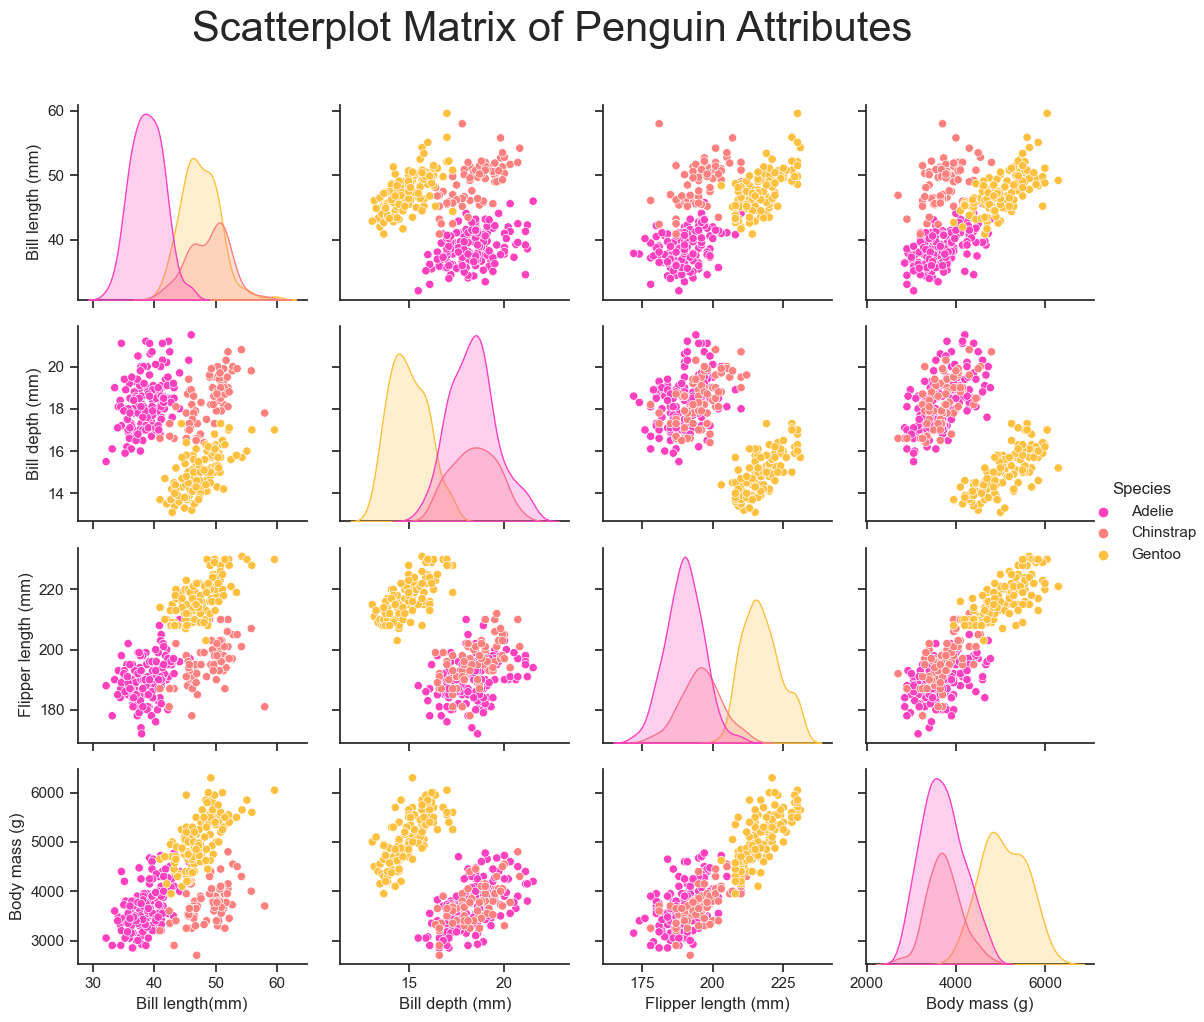

In [4]:
penguins = sns.load_dataset("penguins")   # Load the penguins dataset
sns.set_theme(style="ticks")              # Sets theme of graph to have major and minor tick marks on gray axes, with a white background

scattermatrix = sns.pairplot(             # asks to generate a grid of plots
            penguins,                     # assigns data set 
            hue="species",                # assigns a variable to differentiate color by
            palette="spring",             # assigns a color palette to hue
            )             
scattermatrix.fig.suptitle("Scatterplot Matrix of Penguin Attributes", y =1.02, fontsize=30)       # assigns title position not to overlap
scattermatrix.legend.set_bbox_to_anchor((1.08,0.5))                                                # assigns legend position not to overlap
scattermatrix.legend.set_title('Species')                                                          # assigns title to legend
scattermatrix.axes[0, 0].set_ylabel("Bill length (mm)")                                             
scattermatrix.axes[1, 0].set_ylabel("Bill depth (mm)")
scattermatrix.axes[2, 0].set_ylabel("Flipper length (mm)")
scattermatrix.axes[3, 0].set_ylabel("Body mass (g)")                                               # assigns axes titles to each plot respective to their matrix indices
scattermatrix.axes[3, 0].set_xlabel("Bill length(mm)")
scattermatrix.axes[3, 1].set_xlabel("Bill depth (mm)")
scattermatrix.axes[3, 2].set_xlabel("Flipper length (mm)")
scattermatrix.axes[3, 3].set_xlabel("Body mass (g)")

plt.tight_layout()                        # formats the layout to be tight
plt.show()                                # displays beautiful scatterplot matrix

folder_path = '../figs/'                             # Specifying folder path

scattermatrixfig = 'scattermatrix.png'               # Specifying filename for saving

save_path = f'{folder_path}/{scattermatrixfig}'      # Combining folder path and filename

scattermatrix.savefig(save_path)                     # Use this figure to save figure in said path

The scatterplot matrix above provides insight into the species relationships amongst the continous variables: body mass (g), bill length (mm), bill depth (mm), and fillper length (mm).
For the plots that consider the same variable, a normal distribution plot is provided to describe the spread of the data. Whereas the other plots articulate the different trends when comparing different penguin attributes.

# Scatterplot with multiple semantics

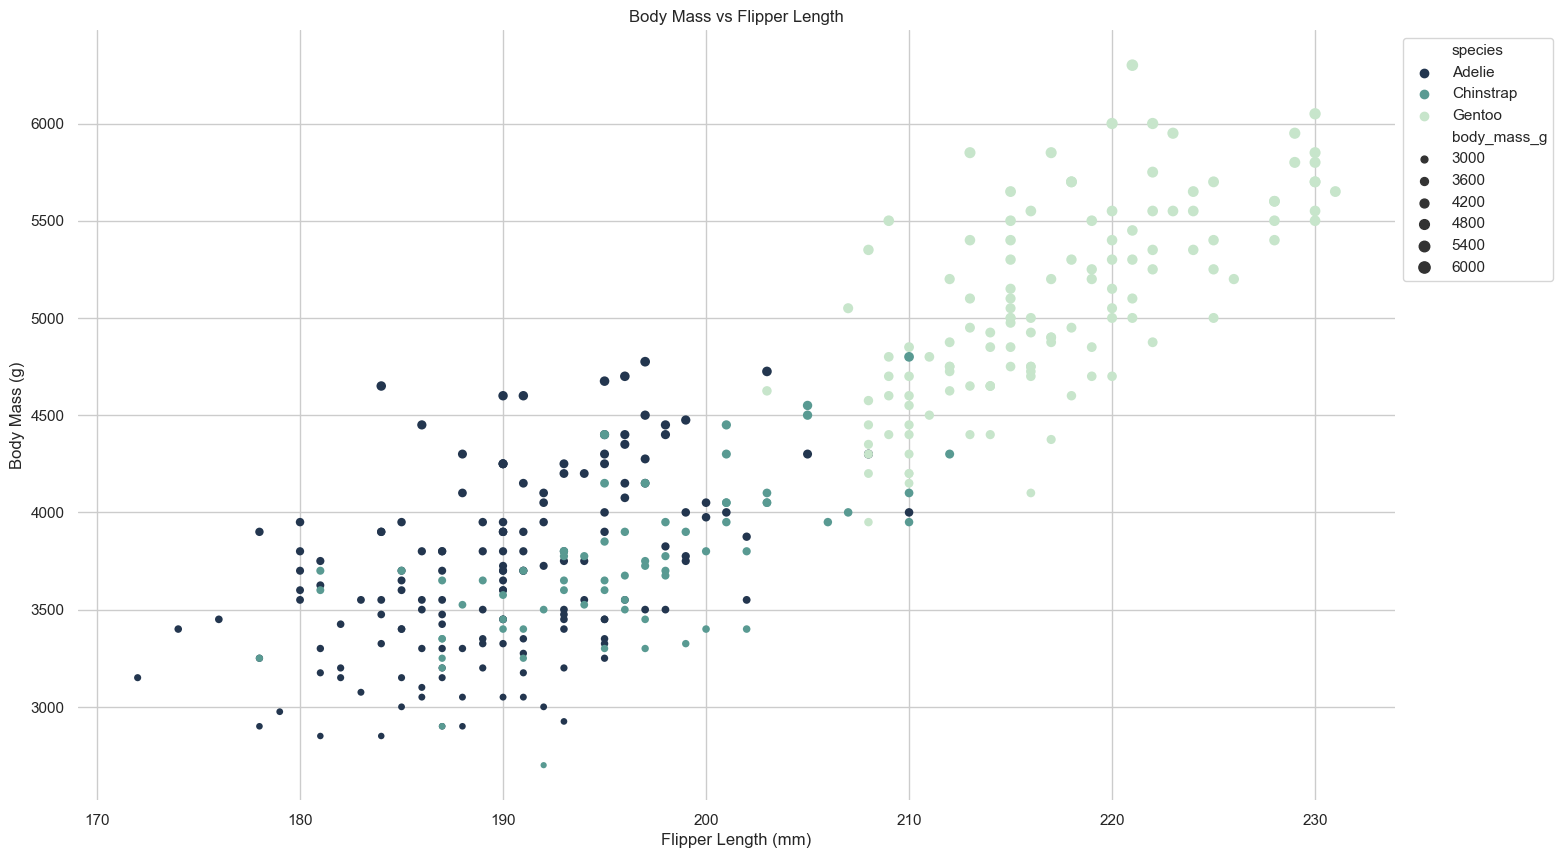

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 10)) 
sns.despine(f, left=True, bottom=True) #removes the frame from the plot
species_ranking = ["Adelie", "Chinstrap", "Gentoo"] 
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", 
                hue="species",  #order it by species
                size='body_mass_g', #size of the points determined by body mass
                palette="ch:r=-.4,d=.2_r", 
                hue_order=species_ranking, #specifies the order in the legend
                sizes=(20, 70), #min and max size of the points
                linewidth=0, #removes the border around the points
                data=penguins, 
                ax=ax) 

# Set axis labels using Seaborn
plt.ylabel("Body Mass (g)")
plt.xlabel("Flipper Length (mm)")
plt.title("Body Mass vs Flipper Length")
plt.legend( 
    loc="upper left", bbox_to_anchor=(1, 1),
)

This plot shows the relationship between flipper length and body mass. Although it looks like a regular scatterplot, seaborn can do a lot with a much bigger dataset. ~344 values in each col

## Using a larger dataset with the scatterplot

Error in callback <function _draw_all_if_interactive at 0x00000223CEA9FF40> (for post_execute):


KeyboardInterrupt: 

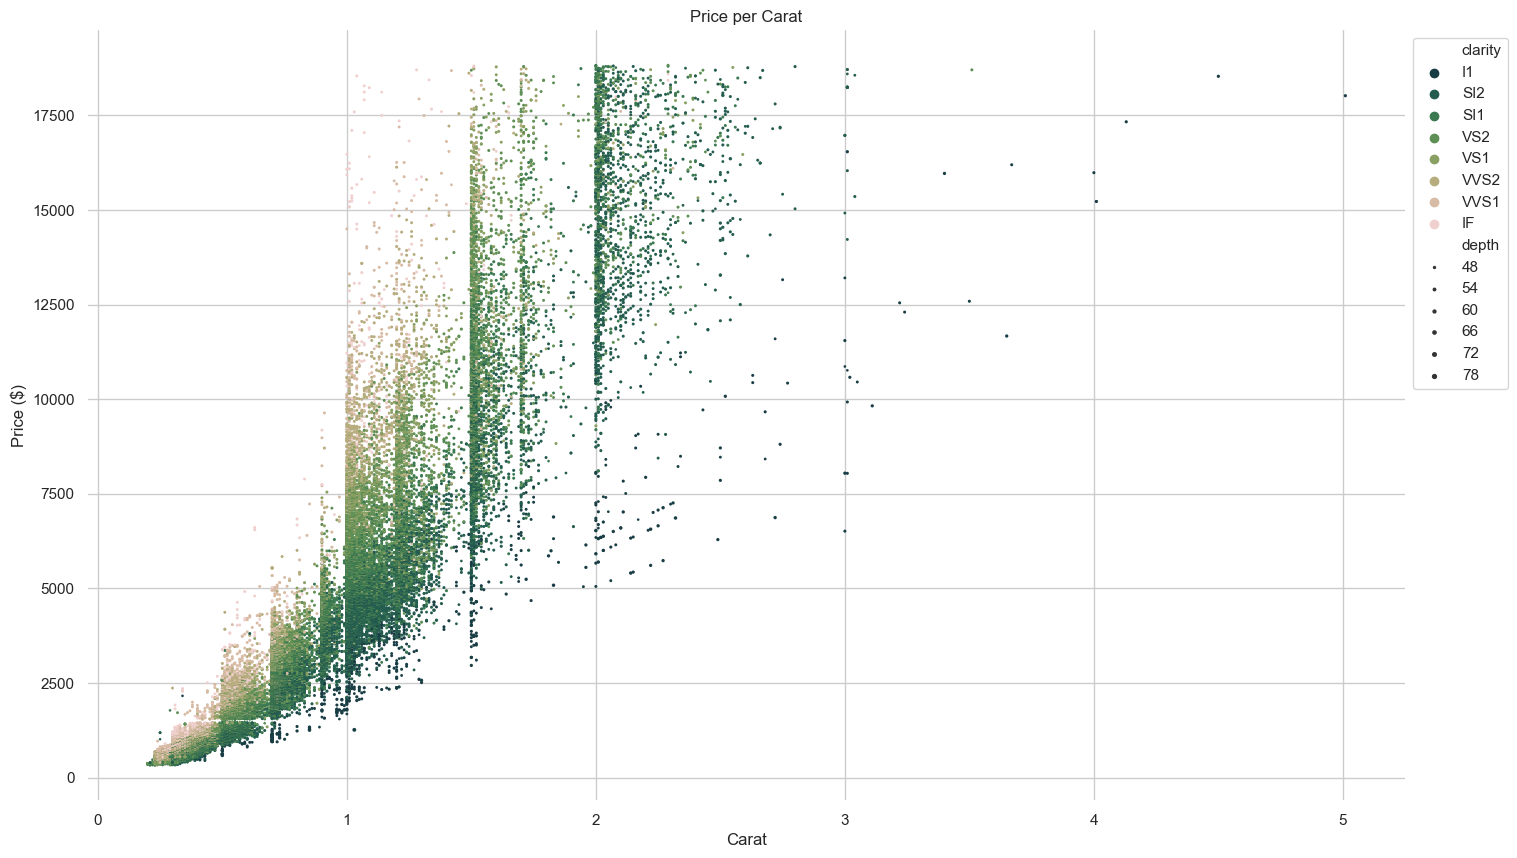

In [6]:
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.8,d=.2_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

# Set axis labels using Seaborn
plt.ylabel("Price ($)")
plt.xlabel("Carat")
plt.title("Price per Carat")
plt.legend(
     loc="upper left", bbox_to_anchor=(1, 1),
)

Seaborn can handle large amounts of data to create an aesthetic graph. This data set is a lot larger with about 54000 values per column. It plots out the graph nicely showing the positive correlation between price and carat of the diamonds.

Great for :
Allowing you to examine how different categories interact with your continuous variables.

# Hexbin plot with marginal distribution

Text(0.5, 1.02, 'Body Mass vs Flipper Length')

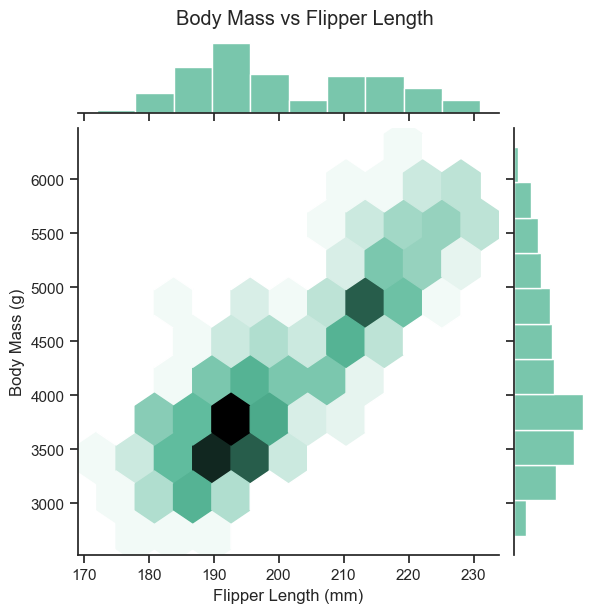

In [ ]:
sns.set_theme(style="ticks")

penguins = sns.load_dataset("penguins")
a = sns.jointplot(x="flipper_length_mm", y="body_mass_g", #call the data
               kind = "hex", #choose what kind of points you want on the graph
                color="#4CB391", #choose your color!
                data=penguins)#call the data

plt.ylabel("Body Mass (g)")
plt.xlabel("Flipper Length (mm)")
a.fig.suptitle("Body Mass vs Flipper Length", y =1.02)

#a.savefig("body_flipperlength_hex")

This is the relationship between flipper length and body mass using the jointplot function with kind = hex (instead of scatter). the histograms created on each side shows the density in each area. 

Great for :
Vizualizing the density or concentration of data points in different areas of a scatterplot.

# Violin Plot

The Seaborn Violin Plot shows the distribution of quantitative data across several levvels of one or more categorical variables so that the distributions can be compared. It's very effective in showing multiple distributions of data once. On the other hand, this graph could be misleading when using smaller datasets because it may appear smoother than the actual data distribution. 

Text(0.5, 1.0, 'Body Mass Distribution by Sex')

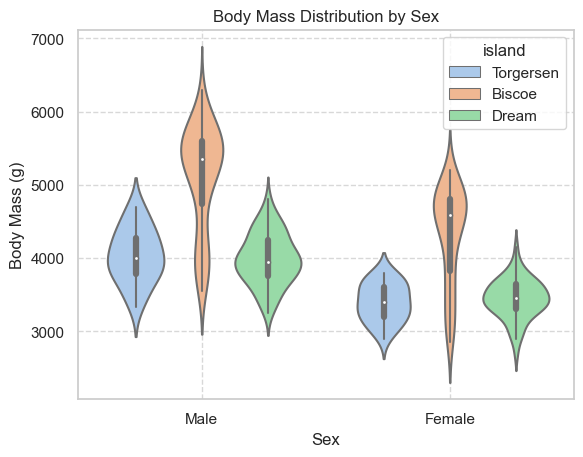

In [8]:
sns.set_theme(style="whitegrid") #sets the theme 
sns.violinplot(x = "sex",  #X value
               y = "body_mass_g",   #Y value
               data = penguins,  #Dataframe 
               hue = "island", #Indicates the specific colors used to distinguish between the islands 
               palette = "pastel") #Uses the orange palette 
plt.grid(True, 
         linestyle='--', #Specific linestyle of gridline
         alpha=0.75) #Sets transparents levels to 0.75
plt.xlabel("Sex") #Sets x axis title
plt.ylabel("Body Mass (g)") #Sets y axis title 
plt.title("Body Mass Distribution by Sex")


Using a violin plot, we were able to examine the distribution of body mass' across different sexes and islands. In this plot, the population on the Biscoe island (both  male and female) shows a much larger distribution in body mass and a higher average body mass than the other two isladns. In comparison, the populations from the Drea, and Torgersen islands have a much smaller distribiution and a lower average in body mass as well and being independent of sex. 

# The Seaborn Paired Density and Scatterplot Matrix

This graph is effective in visualizing and exploring the relationships between multiple pairs of variables simultaneously. Each cell in the matrix represents a different relationship between two variables making it easier to identify patterns, correlations, distributions, and associations. This can also be a useful tool examining gaps in data such as discrepancies or missing values. 

Text(0.5, 0.98, 'Variable Relationships and Distribution By Species')

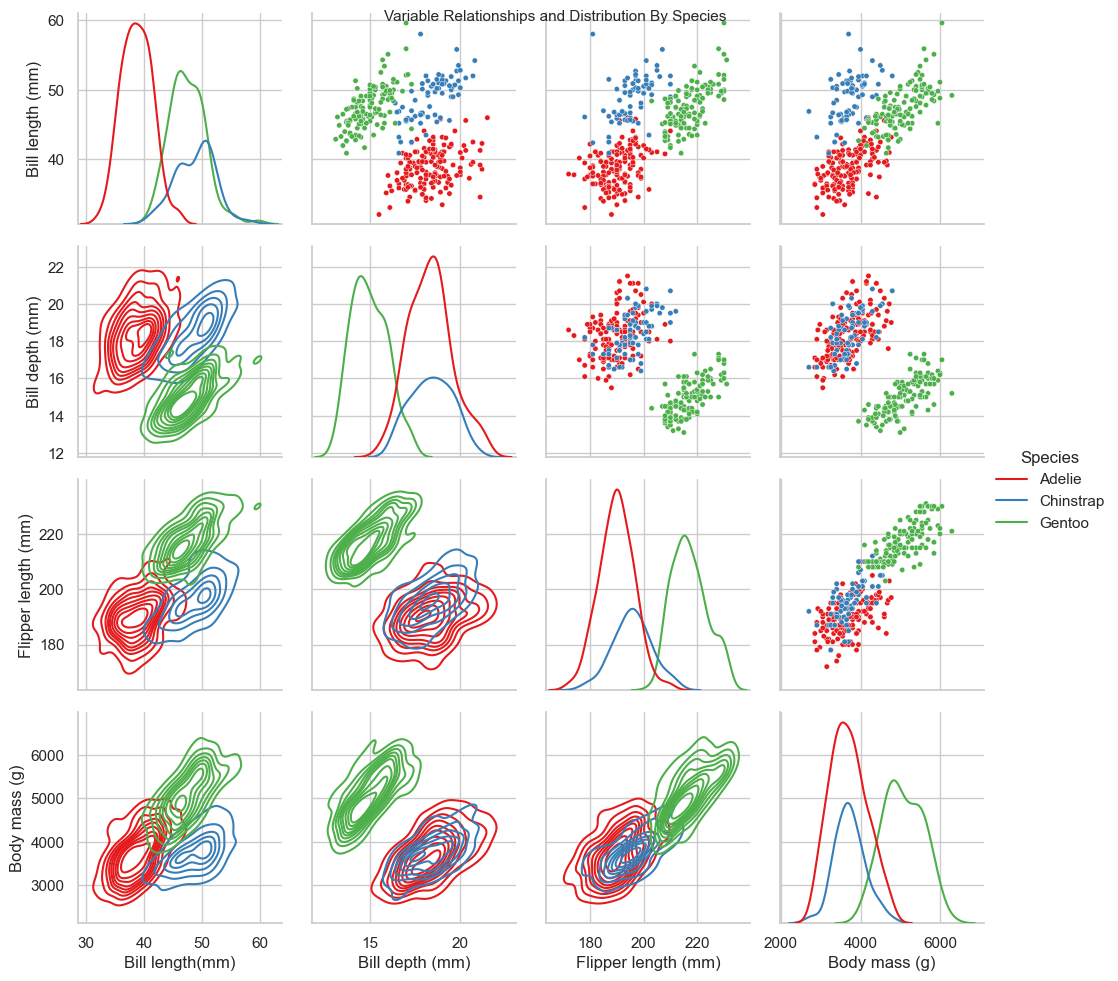

In [2]:
sns.set_theme(style="whitegrid") #Sets the theme to a white background with gridlines 

penguingrid = sns.load_dataset("penguins") #Loads the dataframe 

pgrid = sns.PairGrid(penguingrid,  #This creates a PairGrid
                 diag_sharey=False, #Specifies that the y axes for diagonal plots should not be shared but should be unique 
                 hue = "species", #Specifies the species by particular color 
                 palette= "Set1")  #Uses the plasma palette 
pgrid.map_upper(sns.scatterplot, s=15, edgecolor = 'w') #Maps the upper triangle of the PairGrid with scatterplots. Also sets the size and edgecolor for the scatterpoints. 
pgrid.map_lower(sns.kdeplot) #Sets the lower triangle to kde plots
pgrid.map_diag(sns.kdeplot, lw=1.5) #MAps the diaganol of the PairGrid with KDE plots and specifically KDE curves with linewidths of 1.5.
#KDE curves are the actual smoothed curves representing the estimated probability density funciton of a continous random variable while the plots refer 
#to the visual representation of the KDE curves on a plot. 
pgrid.add_legend(title="Species") #Creates a legend  

#The axes below sets unique x and y labels based off the position [row, column]
pgrid.axes[0, 0].set_ylabel("Bill length (mm)")
pgrid.axes[1, 0].set_ylabel("Bill depth (mm)")
pgrid.axes[2, 0].set_ylabel("Flipper length (mm)")
pgrid.axes[3, 0].set_ylabel("Body mass (g)")
pgrid.axes[3, 0].set_xlabel("Bill length(mm)")
pgrid.axes[3, 1].set_xlabel("Bill depth (mm)")
pgrid.axes[3, 2].set_xlabel("Flipper length (mm)")
pgrid.axes[3, 3].set_xlabel("Body mass (g)")

pgrid.fig.suptitle("Variable Relationships and Distribution By Species", fontsize =11) #Creates a title for the plot

In this graph we were able to examine the relationships between each variable across the dataframe simultaneously. This particular graph was effective in displaying density differences, distributional differences, and correlations between bill length, bill depth, flipper length, and body mass across each species. 

# The Conditional Kernel Density Estimate

This graph is an effective tool for visualizing and analyzing conditional distributions and in particular, useful for exploring the creation of conditional density plots. The kernel density estimate (KDE) plot is also effective in visualizing distributions using a continuous probability density curve in one or more dimensions. Relative to a histogram, it produces a plot less cluttered and more interpretable. On the other hand, it does have the potential to introduce distortions if the data is initially bounded or not smooth. 

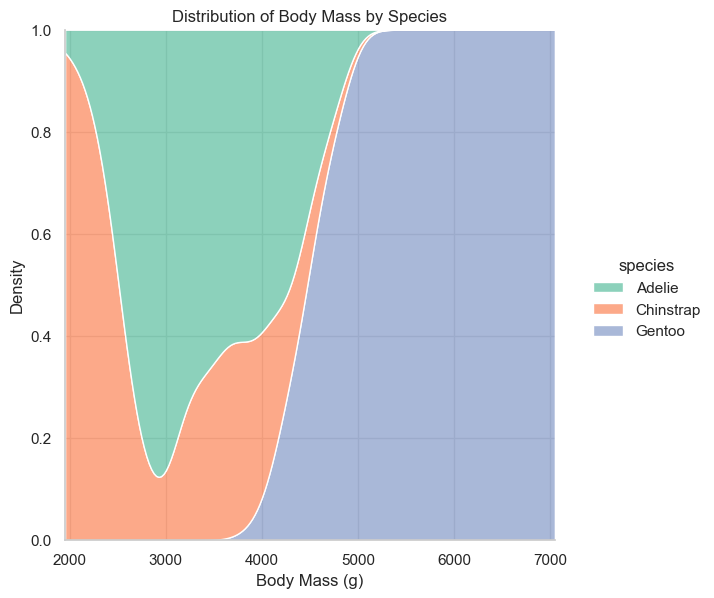

In [3]:
#Sets the Seaborn theme to whitegrid which provides a white background with gridlines
sns.set_theme(style="whitegrid")

displot = sns.displot( #Creates the distribution plot sns.displot(...)
    data=penguins, #dataframe
    x="body_mass_g", 
    hue="species", #Indicates the specific colors used to distinguish between species  
    kind="kde", #Specifies that a kernel density estimation (KDE) plot is used to visualize distribution. KDE is a smoothed representation of the probability density of the data. 
    height=6, #Sets height of plot to 6 inches
    multiple="fill", #Normalizes the KDEs to fill plot area
    palette="Set2", #Creates the color palette, effective for colorblindness
)

displot.set(title = "Distribution of Body Mass by Species") #Creates title 
displot.set_axis_labels(x_var = "Body Mass (g)") #Creates unique axis labels 

#Did not set x limits to begin at 0 because there is no data for body mass below 2000g and therefore creates a blank in the graph 

In this graph, we were able to perform a body mass density analysis across the 3 separate species of penguins. Using this tool, we were able to show the distribution of body mass' in which each color represents a different species. One interpretation of this plot is that a large portion of the Gentoo population occupies the higher values in this body mass range. 